In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data_raw.csv')
data.head()

,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality
0,2016-10-31,1,135.0,True,black,10.16,6,06.Mobile phone accessories
1,2016-11-07,1,102.0,True,black,9.86,6,06.Mobile phone accessories
2,2016-11-14,1,110.0,True,black,10.24,6,06.Mobile phone accessories
3,2016-11-21,1,127.0,True,black,8.27,6,06.Mobile phone accessories
4,2016-11-28,1,84.0,True,black,8.83,6,06.Mobile phone accessories


In [3]:
import re
# Remove numbers before functionality names
data['functionality'] = data['functionality'].apply(lambda x: re.sub(r'^\d+\.\s*', '', x.lower()))

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   week            4400 non-null   object 
 1   sku             4400 non-null   int64  
 2   weekly_sales    4400 non-null   float64
 3   feat_main_page  4400 non-null   bool   
 4   color           4390 non-null   object 
 5   price           4400 non-null   float64
 6   vendor          4400 non-null   int64  
 7   functionality   4400 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 245.1+ KB


In [5]:
data["color"].unique()

array(['black', 'blue', 'purple', 'red', nan, 'white', 'none', 'green',
       'grey', 'gold', 'pink'], dtype=object)

In [6]:
data["functionality"].value_counts()

functionality
mobile phone accessories        1100
selfie sticks                    700
smartphone stands                600
portable smartphone chargers     500
streaming sticks                 400
headphones                       200
fitness trackers                 200
digital pencils                  200
flash drives                     200
bluetooth speakers               100
vr headset                       100
bluetooth tracker                100
Name: count, dtype: int64

In [7]:
data.describe()

,sku,weekly_sales,price,vendor
count,4400.000000,4400.000000,4400.000000,4400.000000
mean,22.500000,83.054773,44.432709,6.909091
std,12.699868,288.000205,42.500295,2.503175
min,1.000000,0.000000,2.390000,1.000000
25%,11.750000,11.000000,15.680000,6.000000
50%,22.500000,25.000000,27.550000,6.500000
75%,33.250000,70.000000,54.990000,9.000000
max,44.000000,7512.000000,227.720000,10.000000


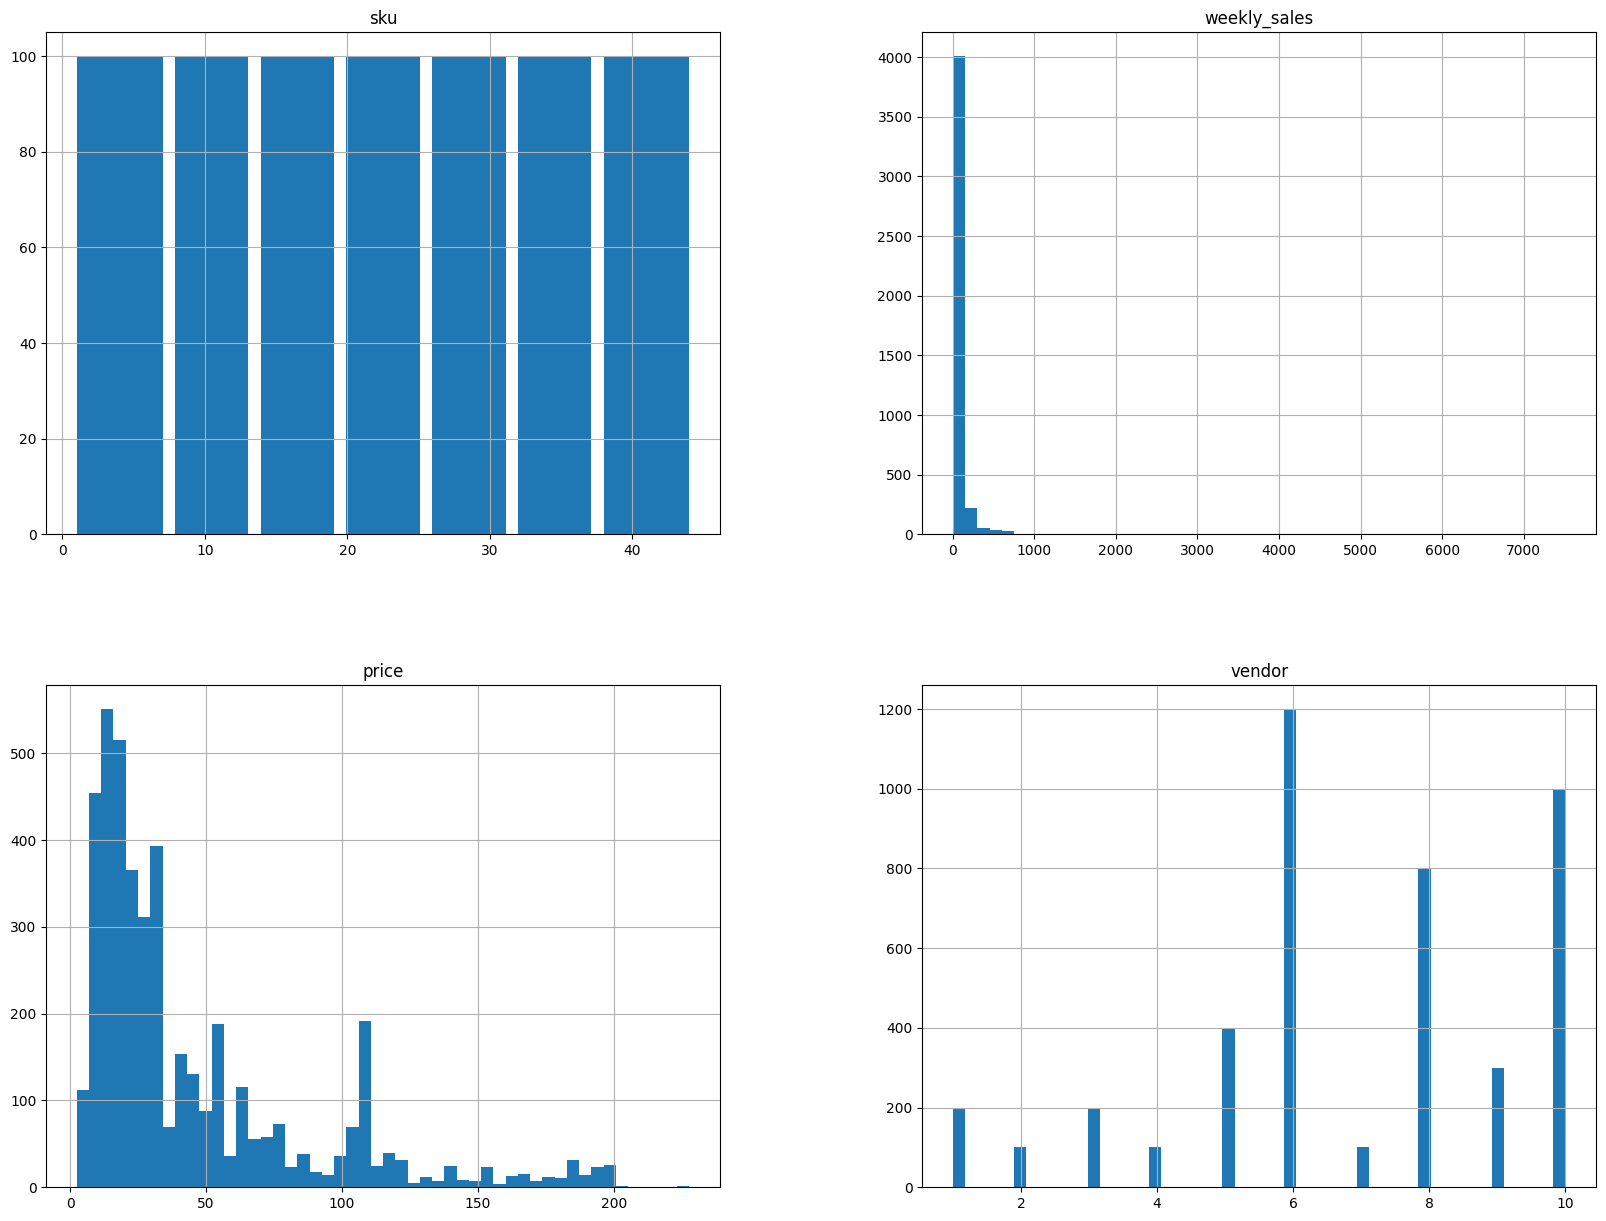

In [8]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
# Transform the week attribute to datetime datatype and sort the data by week
data['week'] = pd.to_datetime(data['week'])
data = data.sort_values(by='week').reset_index(drop=True)
data.head()

,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality
0,2016-10-31,1,135.0,True,black,10.16,6,mobile phone accessories
1,2016-10-31,36,33.0,True,red,47.42,8,portable smartphone chargers
2,2016-10-31,33,10.0,False,green,11.54,8,selfie sticks
3,2016-10-31,2,9.0,False,blue,62.93,1,headphones
4,2016-10-31,8,31.0,True,black,106.24,10,bluetooth speakers


### ***Data Exploration***

In [10]:
df= data.copy()

In [11]:
# Group the data by SKU and count the number of unique colors for each SKU
sku_color_counts = df.groupby('sku')['color'].nunique()

# Filter SKUs with more than one unique color
skus_with_multiple_colors = sku_color_counts[sku_color_counts > 1].index.tolist()

if len(skus_with_multiple_colors) > 0:
    # Print the SKUs with multiple colors
    print("SKUs with multiple colors:", skus_with_multiple_colors)
else:
    print("There are no skus with different colors")

There are no skus with different colors


In [12]:
df.isnull().sum()

week               0
sku                0
weekly_sales       0
feat_main_page     0
color             10
price              0
vendor             0
functionality      0
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [14]:
skus_with_missing_values = df[df['color'].isnull()]['sku'].unique()

for sku in skus_with_missing_values:
    imputer.fit(df[df.sku==sku][['sku','color']])
    imputer.transform(df[ (df.sku ==sku) & (df.color.isna())][['sku','color']] )
    missing_idx = df[(df.color.isna()) & (df.sku==sku)].index.values
    for i in missing_idx:
        df.at[i, 'color']= imputer.transform(df[ (df.sku ==sku) & (df.color.isna())][['sku','color']] )[0,1]

In [15]:
# Group the data by color and aggregate the SKUs for each group
sku_colors = df.groupby('color')['sku'].unique()

# Print the different skus for each functionality
for color, skus in sku_colors.items():
    print(f"{color} : {skus}")

black : [ 1  8 19 31 13 12 41 26 40 14 28 18 32 44  9 42 11]
blue : [ 2 27  6  7 38 16 17]
gold : [43 37]
green : [33 21 23 25]
grey : [34 29 30]
none : [24 20]
pink : [39]
purple : [3]
red : [36  5 15 35  4]
white : [10 22]


In [17]:
# Group the data by vendor and count the number of unique SKUs for each vendor
vendor_sku_counts = df.groupby('vendor')['sku'].nunique()

# Filter vendors with more than one unique SKU
vendors_with_multiple_skus = vendor_sku_counts[vendor_sku_counts > 1].index.tolist()

if len(vendors_with_multiple_skus) > 0:
    # Print the vendors with more than one SKU
    print("Vendors with more than one SKU:", vendors_with_multiple_skus)
else:
    print("There are no vendors with more than one SKU.")

Vendors with more than one SKU: [1, 3, 5, 6, 8, 9, 10]


In [16]:
for vendor in vendors_with_multiple_skus:
    # Filter the DataFrame for the current vendor
    vendor_skus = df[df['vendor'] == vendor]['sku'].unique()
    print(f"Vendor {vendor} has the following SKUs: {vendor_skus}")

Vendor 1 has the following SKUs: [2 3]
Vendor 3 has the following SKUs: [6 7]
Vendor 5 has the following SKUs: [41 24 40 20]
Vendor 6 has the following SKUs: [ 1 19 31 12 26 15 29 18 44 30 17  4]
Vendor 8 has the following SKUs: [36 33 27 21 34 35 25 16]
Vendor 9 has the following SKUs: [43 10  9]
Vendor 10 has the following SKUs: [ 8 13 39  5 14 28 38 32 42 11]


In [19]:
# Group the data by color and aggregate the SKUs for each group
sku_vendors = df.groupby('vendor')['sku'].unique()

# Print the different skus for each functionality
for vendor, skus in sku_vendors.items():
    print(f"{vendor} : {skus}")

1 : [2 3]
2 : [22]
3 : [6 7]
4 : [23]
5 : [41 24 40 20]
6 : [ 1 19 31 12 26 15 29 18 44 30 17  4]
7 : [37]
8 : [36 33 27 21 34 35 25 16]
9 : [43 10  9]
10 : [ 8 13 39  5 14 28 38 32 42 11]


In [17]:
# Group the data by SKU and count the number of unique functionalities for each SKU
sku_functionality_counts = df.groupby('sku')['functionality'].nunique()

# Filter SKUs with more than one unique functionality
skus_with_multiple_functionalities = sku_functionality_counts[sku_functionality_counts > 1].index.tolist()

if len(skus_with_multiple_functionalities) > 0:
    # Print the SKUs with multiple functionality
    print("SKUs with multiple functionalies:", skus_with_multiple_functionalities)
else:
    print("There are no skus with different functionalities")

There are no skus with different functionalities


In [18]:
# Group the data by functionality and aggregate the SKUs for each group
functionality_skus = df.groupby('functionality')['sku'].unique()

# Print the different skus for each functionality
for functionality, skus in functionality_skus.items():
    print(f"{functionality} : {skus}")

bluetooth speakers : [8]
bluetooth tracker : [22]
digital pencils : [26 18]
fitness trackers : [43  9]
flash drives : [24 20]
headphones : [2 3]
mobile phone accessories : [ 1 31 39  5 40 15 29 38 30 17  4]
portable smartphone chargers : [36 27 34 35 16]
selfie sticks : [33  6 21  7 23 25 37]
smartphone stands : [13 41 14 28 44 42]
streaming sticks : [19 12 32 11]
vr headset : [10]


In [19]:
# Group the data by vendors and aggregate the functionalities for each group
vendor_functionalities = df.groupby('vendor')['functionality'].unique()

# Print the different skus for each functionality
for vendor, functionalities in vendor_functionalities.items():
    print(f"Vendor {vendor} : {functionalities}") 

Vendor 1 : ['headphones']
Vendor 2 : ['bluetooth tracker']
Vendor 3 : ['selfie sticks']
Vendor 4 : ['selfie sticks']
Vendor 5 : ['smartphone stands' 'flash drives' 'mobile phone accessories']
Vendor 6 : ['mobile phone accessories' 'streaming sticks' 'digital pencils'
 'smartphone stands']
Vendor 7 : ['selfie sticks']
Vendor 8 : ['portable smartphone chargers' 'selfie sticks']
Vendor 9 : ['fitness trackers' 'vr headset']
Vendor 10 : ['bluetooth speakers' 'smartphone stands' 'mobile phone accessories'
 'streaming sticks']


In [20]:
df[df.functionality=='selfie sticks'].head(7)

,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality
2,2016-10-31,33,10.0,False,green,11.54,8,selfie sticks
9,2016-10-31,6,12.0,False,blue,30.79,3,selfie sticks
18,2016-10-31,21,3.0,False,green,29.89,8,selfie sticks
19,2016-10-31,7,78.0,True,blue,9.04,3,selfie sticks
30,2016-10-31,23,4.0,False,green,12.09,4,selfie sticks
34,2016-10-31,25,639.0,False,green,6.66,8,selfie sticks
38,2016-10-31,37,7.0,False,gold,16.49,7,selfie sticks


In [21]:
df[df.functionality=='headphones'].head()

,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality
3,2016-10-31,2,9.0,False,blue,62.93,1,headphones
20,2016-10-31,3,6.0,False,purple,103.90,1,headphones
72,2016-11-07,3,3.0,False,purple,109.99,1,headphones
86,2016-11-07,2,6.0,False,blue,64.99,1,headphones
106,2016-11-14,3,38.0,False,purple,73.02,1,headphones


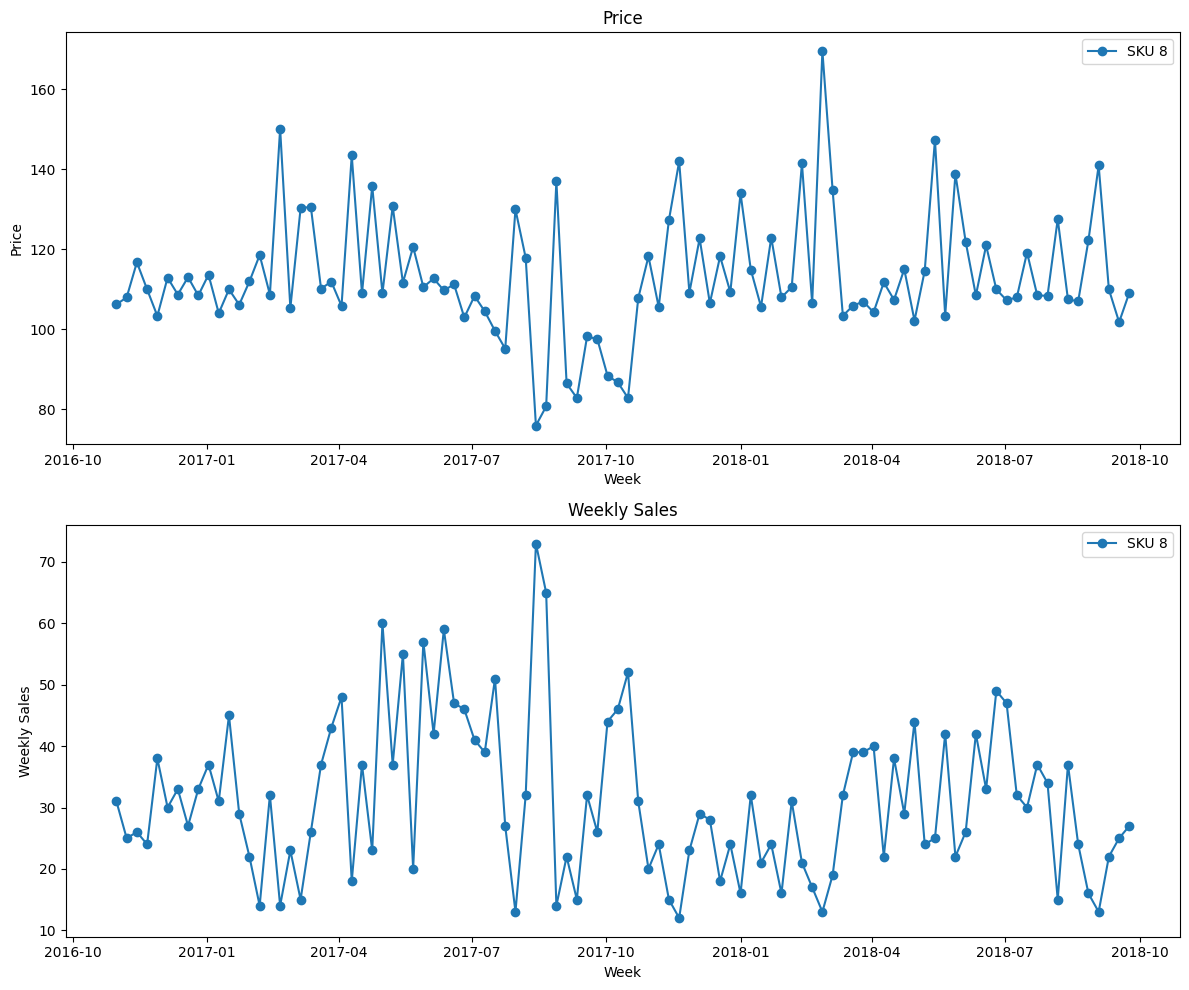

In [22]:
sku8_data = df[df["sku"] == 8]
# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(sku8_data["week"], sku8_data["price"], marker='o', label='SKU 8')
plt.title('Price')
plt.xlabel('Week')
plt.ylabel('Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(sku8_data["week"], sku8_data["weekly_sales"], marker='o', label='SKU 8')
plt.title('Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.legend()

plt.tight_layout()
plt.show()

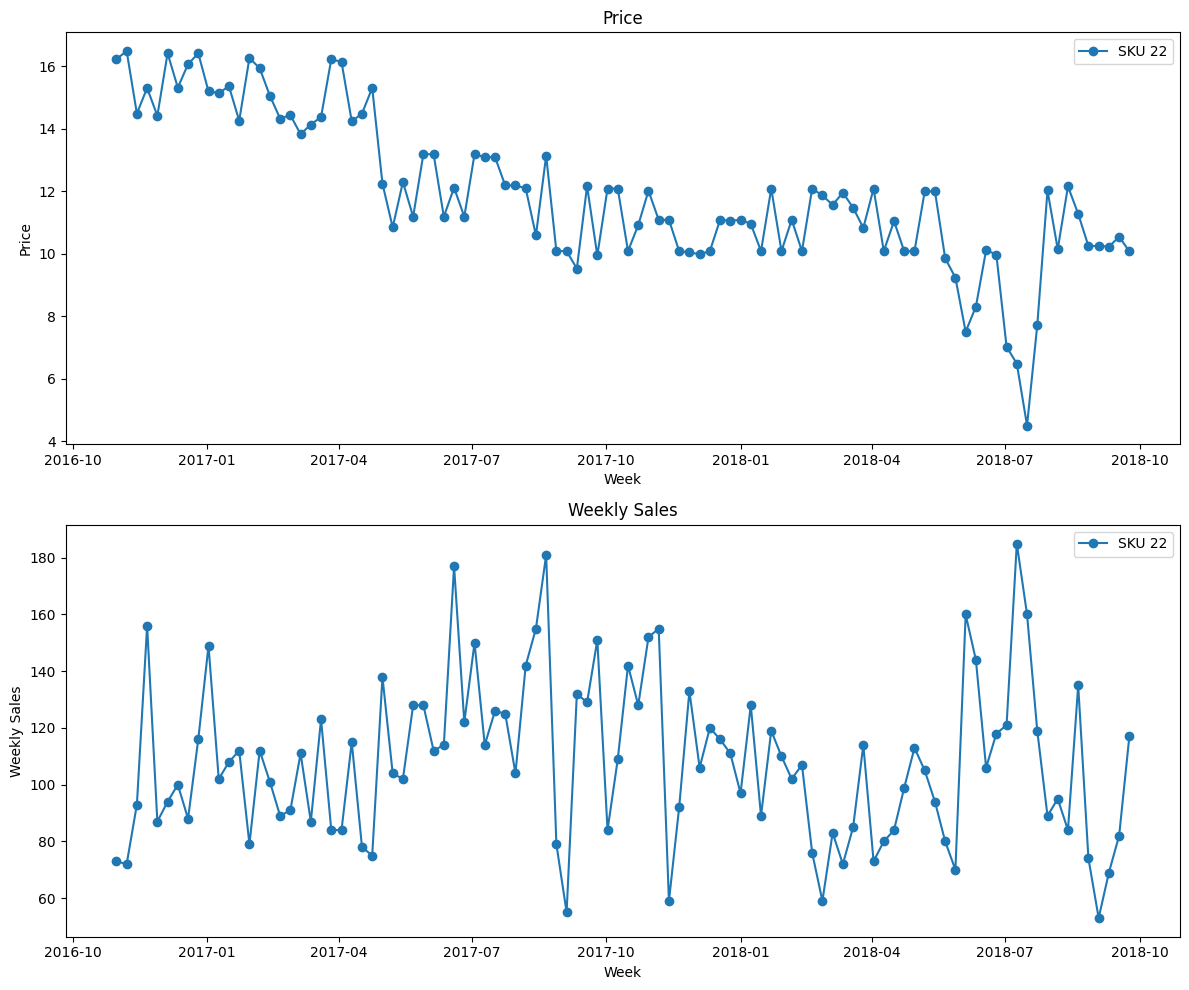

In [23]:
sku22_data = df[df["sku"] == 22]
# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(sku22_data["week"], sku22_data["price"], marker='o', label='SKU 22')
plt.title('Price')
plt.xlabel('Week')
plt.ylabel('Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(sku22_data["week"], sku22_data["weekly_sales"], marker='o', label='SKU 22')
plt.title('Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.legend()

plt.tight_layout()
plt.show()

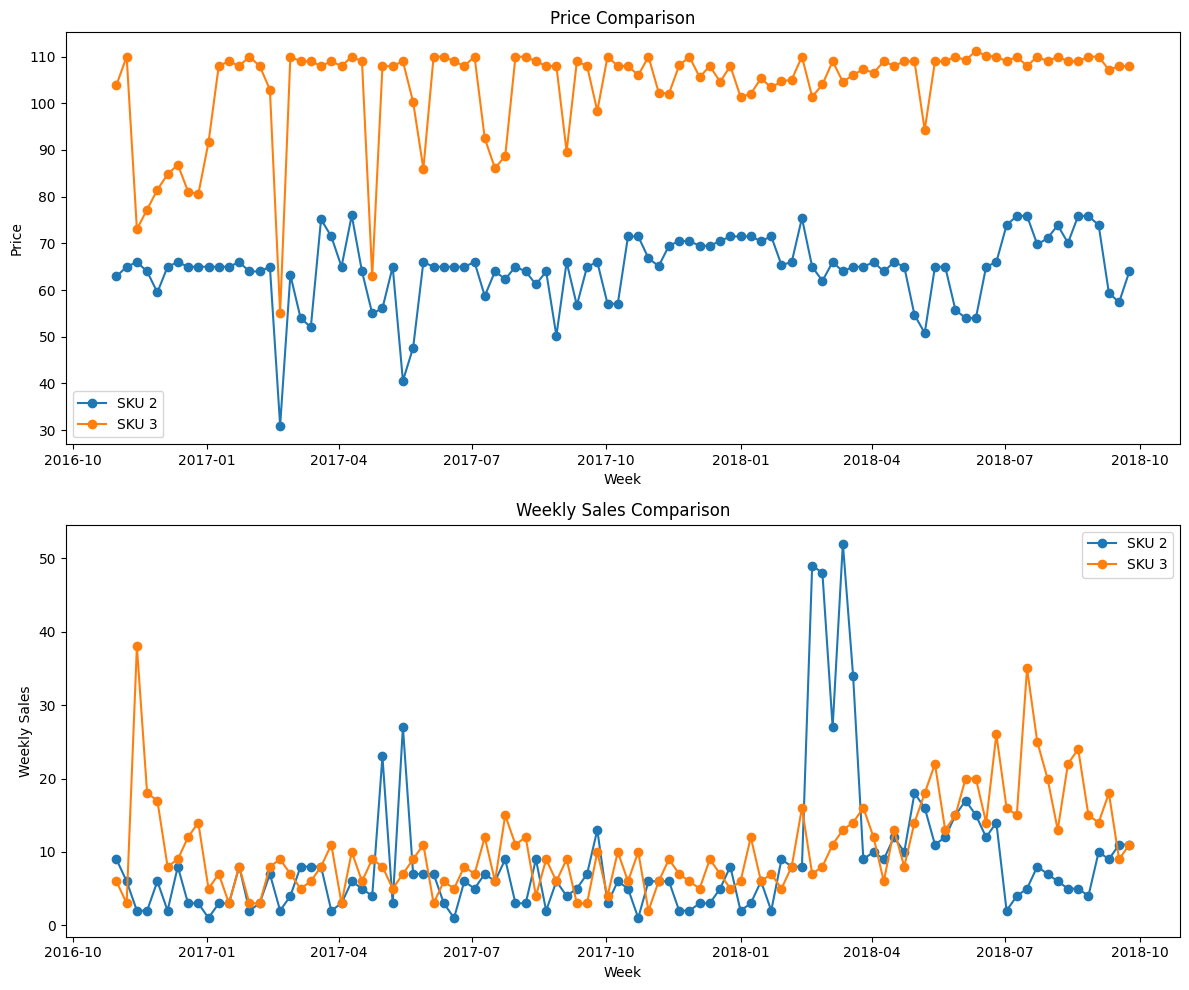

In [24]:
headphones_df = df[df.functionality=='headphones']
# Separate data for each SKU
sku2_data = headphones_df[headphones_df["sku"] == 2]
sku3_data = headphones_df[headphones_df["sku"] == 3]

# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(sku2_data["week"], sku2_data["price"], marker='o', label='SKU 2')
plt.plot(sku3_data["week"], sku3_data["price"], marker='o', label='SKU 3')
plt.title('Price Comparison')
plt.xlabel('Week')
plt.ylabel('Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(sku2_data["week"], sku2_data["weekly_sales"], marker='o', label='SKU 2')
plt.plot(sku3_data["week"], sku3_data["weekly_sales"], marker='o', label='SKU 3')
plt.title('Weekly Sales Comparison')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.legend()

plt.tight_layout()
plt.show()

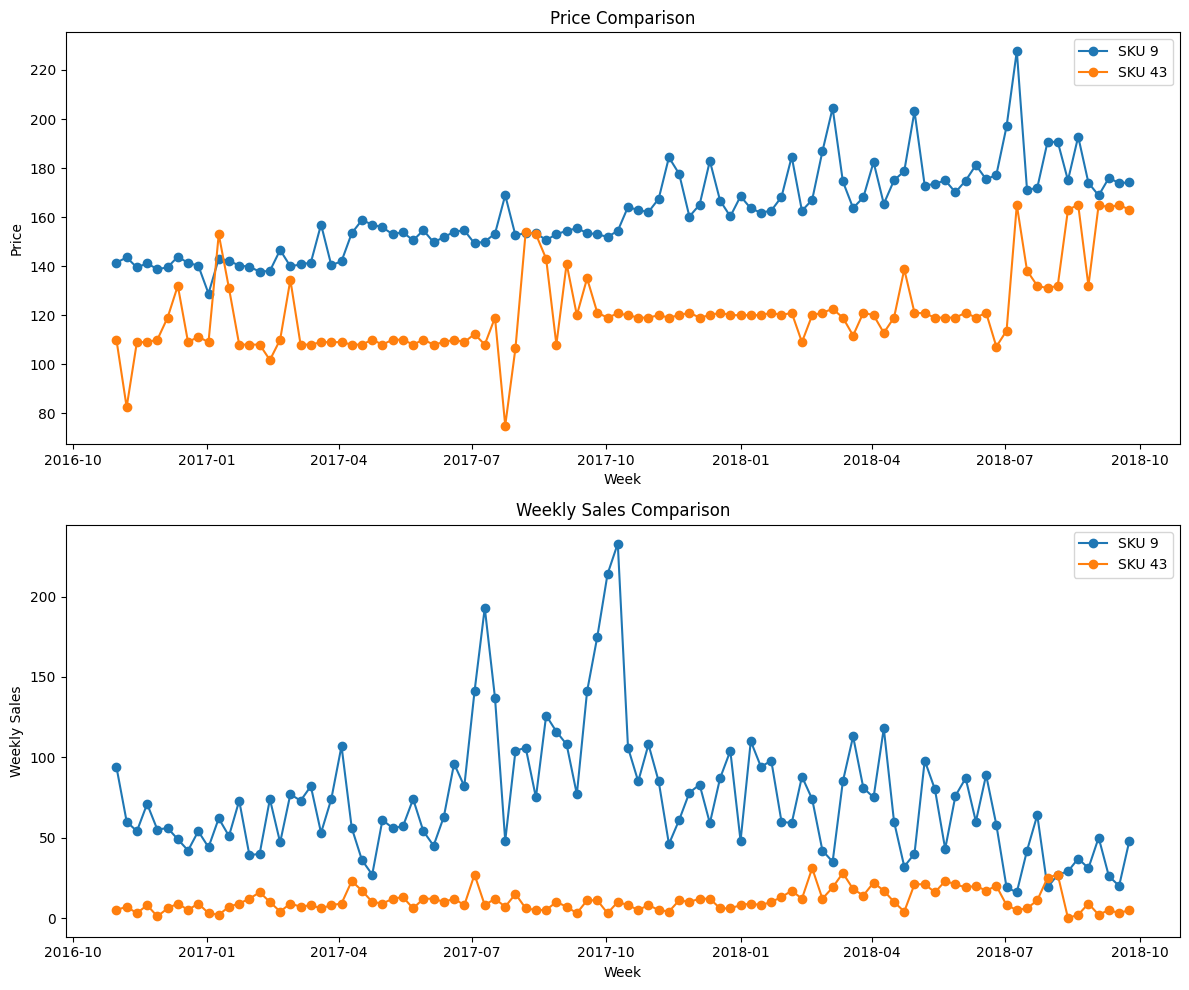

In [25]:
# Separate data for each SKU
sku9_data = df[df["sku"] == 9]
sku43_data = df[df["sku"] == 43]

# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(sku9_data["week"], sku9_data["price"], marker='o', label='SKU 9')
plt.plot(sku43_data["week"], sku43_data["price"], marker='o', label='SKU 43')
plt.title('Price Comparison')
plt.xlabel('Week')
plt.ylabel('Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(sku9_data["week"], sku9_data["weekly_sales"], marker='o', label='SKU 9')
plt.plot(sku43_data["week"], sku43_data["weekly_sales"], marker='o', label='SKU 43')
plt.title('Weekly Sales Comparison')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.legend()

plt.tight_layout()
plt.show()

### ***Handling outliers***

In [26]:
# Group dataset by SKU
sku_groups = df.groupby('sku')

# Identify and remove outliers within each SKU group
processed_data = []
for sku, group_data in sku_groups:
    # Calculate statistical measures for price and weekly_sales
    price_mean = group_data['price'].mean()
    price_std = group_data['price'].std()
    weekly_sales_mean = group_data['weekly_sales'].mean()
    weekly_sales_std = group_data['weekly_sales'].std()
    
    # Define thresholds for outliers (e.g., values outside 3 standard deviations from the mean)
    price_threshold = 3 * price_std
    weekly_sales_threshold = 3 * weekly_sales_std
    
    # Identify outliers
    outliers = ((group_data['price'] < price_mean - price_threshold) | (group_data['price'] > price_mean + price_threshold) |
                (group_data['weekly_sales'] < weekly_sales_mean - weekly_sales_threshold) | (group_data['weekly_sales'] > weekly_sales_mean + weekly_sales_threshold))
    
    # Remove outliers
    processed_data.append(group_data[~outliers])

# Concatenate cleaned data for all SKU groups
processed_df = pd.concat(processed_data)

### ***Feature Engineering***

In [27]:
# Calculate Price Difference
def calculate_price_difference(df):
    avg_price = df.groupby(['functionality', 'week'])['price'].transform('mean')
    df['avg_price'] = avg_price
    df['price_difference'] = df['price'] - avg_price
    return df

In [28]:
processed_df = calculate_price_difference(processed_df)

In [29]:
processed_df[processed_df.functionality=='headphones'].head(8)

,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality,avg_price,price_difference
3,2016-10-31,2,9.0,False,blue,62.93,1,headphones,83.415,-20.485
86,2016-11-07,2,6.0,False,blue,64.99,1,headphones,87.490,-22.500
126,2016-11-14,2,2.0,False,blue,65.99,1,headphones,65.990,0.000
157,2016-11-21,2,2.0,False,blue,63.99,1,headphones,70.620,-6.630
210,2016-11-28,2,6.0,False,blue,59.49,1,headphones,70.490,-11.000
244,2016-12-05,2,2.0,False,blue,64.99,1,headphones,74.885,-9.895
283,2016-12-12,2,8.0,False,blue,65.99,1,headphones,76.435,-10.445
323,2016-12-19,2,3.0,False,blue,64.99,1,headphones,73.045,-8.055


In [30]:
def create_lagged_price(df, lag_weeks):
    # Create lagged price features for each SKU
    for lag in range(1, lag_weeks + 1):
        df[f'price_lag_{lag}'] = df.groupby('sku')['price'].shift(lag)
        
    # Drop rows with null values in lagged price columns
    lagged_price_cols = [f'price_lag_{lag}' for lag in range(1, lag_weeks + 1)]
    df.dropna(subset=lagged_price_cols, inplace=True)

In [31]:
# Define the number of lagged weeks
lag_weeks = 2
    
# Lag prices
create_lagged_price(processed_df, lag_weeks)

In [32]:
def create_lagged_price_difference(df, lag_weeks):
    for lag in range(1, lag_weeks + 1):
        # Calculate price difference
        df[f'price_lag_difference_{lag}'] = df['price'] - df[f'price_lag_{lag}']
    return df

In [33]:
# Define the number of lagged periods
lag_weeks = 2

# Create lagged price difference features
create_lagged_price_difference(processed_df, lag_weeks)
processed_df.head()

,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality,avg_price,price_difference,price_lag_1,price_lag_2,price_lag_difference_1,price_lag_difference_2
209,2016-11-28,1,84.0,True,black,8.83,6,mobile phone accessories,24.663000,-15.833000,10.24,9.86,-1.41,-1.03
228,2016-12-05,1,87.0,True,black,8.98,6,mobile phone accessories,24.748182,-15.768182,8.83,10.24,0.15,-1.26
270,2016-12-12,1,64.0,True,black,10.40,6,mobile phone accessories,22.480909,-12.080909,8.98,8.83,1.42,1.57
392,2016-12-26,1,23.0,True,black,10.49,6,mobile phone accessories,21.898182,-11.408182,10.40,8.98,0.09,1.51
482,2017-01-09,1,85.0,True,black,11.91,6,mobile phone accessories,22.274545,-10.364545,10.49,10.40,1.42,1.51


In [34]:
processed_df['year'] = processed_df['week'].dt.year - 2016
processed_df['month'] = processed_df['week'].dt.month
processed_df['week_number'] = processed_df['week'].dt.isocalendar().week

In [35]:
feature_order = ["week", "year", "month", "week_number",  "sku", "price", "avg_price", 
                 "price_difference", "price_lag_1", "price_lag_2", 
                 "price_lag_difference_1", "price_lag_difference_2", 
                 "feat_main_page", "color", "vendor", "functionality", "weekly_sales"]

# Reindex the DataFrame columns
processed_df = processed_df.reindex(columns=feature_order)
processed_df = processed_df.reset_index(drop=True)

In [36]:
processed_df.head()

,week,year,month,week_number,sku,price,avg_price,price_difference,price_lag_1,price_lag_2,price_lag_difference_1,price_lag_difference_2,feat_main_page,color,vendor,functionality,weekly_sales
0,2016-11-28,0,11,48,1,8.83,24.663000,-15.833000,10.24,9.86,-1.41,-1.03,True,black,6,mobile phone accessories,84.0
1,2016-12-05,0,12,49,1,8.98,24.748182,-15.768182,8.83,10.24,0.15,-1.26,True,black,6,mobile phone accessories,87.0
2,2016-12-12,0,12,50,1,10.40,22.480909,-12.080909,8.98,8.83,1.42,1.57,True,black,6,mobile phone accessories,64.0
3,2016-12-26,0,12,52,1,10.49,21.898182,-11.408182,10.40,8.98,0.09,1.51,True,black,6,mobile phone accessories,23.0
4,2017-01-09,1,1,2,1,11.91,22.274545,-10.364545,10.49,10.40,1.42,1.51,True,black,6,mobile phone accessories,85.0


### ***Feature Scalling***

In [37]:
from sklearn.preprocessing import StandardScaler

# Numerical columns for scaling
num_cols = ["price", "avg_price", "price_difference", "price_lag_1", "price_lag_2", 
            "price_lag_difference_1", "price_lag_difference_2"]

# Initializing StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numerical columns
df_scaled = processed_df .copy()  
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

In [38]:
df_scaled.head()

,week,year,month,week_number,sku,price,avg_price,price_difference,price_lag_1,price_lag_2,price_lag_difference_1,price_lag_difference_2,feat_main_page,color,vendor,functionality,weekly_sales
0,2016-11-28,0,11,48,1,-0.840913,-0.514526,-0.890871,-0.807498,-0.816331,-0.172888,-0.117635,True,black,6,mobile phone accessories,84.0
1,2016-12-05,0,12,49,1,-0.837371,-0.512310,-0.887224,-0.840820,-0.807348,0.014016,-0.142695,True,black,6,mobile phone accessories,87.0
2,2016-12-12,0,12,50,1,-0.803840,-0.571294,-0.679769,-0.837275,-0.840680,0.166174,0.165647,True,black,6,mobile phone accessories,64.0
3,2016-12-26,0,12,52,1,-0.801715,-0.586454,-0.641919,-0.803716,-0.837134,0.006827,0.159110,True,black,6,mobile phone accessories,23.0
4,2017-01-09,1,1,2,1,-0.768184,-0.576663,-0.583201,-0.801589,-0.803566,0.166174,0.159110,True,black,6,mobile phone accessories,85.0


### ***Handling Categorical Attributes***

In [39]:
df_encoded = pd.get_dummies(data=df_scaled, columns=['functionality','color'], drop_first = True)
df_encoded.head()

,week,year,month,week_number,sku,price,avg_price,price_difference,price_lag_1,price_lag_2,...,functionality_vr headset,color_blue,color_gold,color_green,color_grey,color_none,color_pink,color_purple,color_red,color_white
0,2016-11-28,0,11,48,1,-0.840913,-0.514526,-0.890871,-0.807498,-0.816331,...,False,False,False,False,False,False,False,False,False,False
1,2016-12-05,0,12,49,1,-0.837371,-0.512310,-0.887224,-0.840820,-0.807348,...,False,False,False,False,False,False,False,False,False,False
2,2016-12-12,0,12,50,1,-0.803840,-0.571294,-0.679769,-0.837275,-0.840680,...,False,False,False,False,False,False,False,False,False,False
3,2016-12-26,0,12,52,1,-0.801715,-0.586454,-0.641919,-0.803716,-0.837134,...,False,False,False,False,False,False,False,False,False,False
4,2017-01-09,1,1,2,1,-0.768184,-0.576663,-0.583201,-0.801589,-0.803566,...,False,False,False,False,False,False,False,False,False,False


In [40]:
df_encoded['feat_main_page'] = df_encoded.feat_main_page.astype('int')

In [51]:
df_encoded['week'] = pd.to_datetime(df_encoded['week'])
df_encoded  = df_encoded.sort_values(by='week').reset_index(drop=True)
df_encoded.head()

,week,year,month,week_number,sku,price,avg_price,price_difference,price_lag_1,price_lag_2,...,functionality_vr headset,color_blue,color_gold,color_green,color_grey,color_none,color_pink,color_purple,color_red,color_white
0,2016-11-14,0,11,46,25,-0.873500,-0.774909,-0.405397,-0.867997,-0.891979,...,False,False,False,True,False,False,False,False,False,False
1,2016-11-14,0,11,46,17,-0.589903,-0.576474,-0.158827,-0.126404,-0.423201,...,False,True,False,False,False,False,False,False,False,False
2,2016-11-14,0,11,46,40,-0.836663,-0.576474,-0.746772,-0.887140,-0.884177,...,False,False,False,False,False,False,False,False,False,False
3,2016-11-14,0,11,46,18,1.547817,0.808030,1.940435,1.549861,1.550724,...,False,False,False,False,False,False,False,False,False,False
4,2016-11-14,0,11,46,19,0.989833,0.452462,1.379918,1.422245,1.502026,...,False,False,False,False,False,False,False,False,False,False


### ***Create a Test Set***

In [52]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train, test = train_test_split(df_encoded, test_size=0.2, shuffle=False)

In [53]:
train

,week,year,month,week_number,sku,price,avg_price,price_difference,price_lag_1,price_lag_2,...,functionality_vr headset,color_blue,color_gold,color_green,color_grey,color_none,color_pink,color_purple,color_red,color_white
0,2016-11-14,0,11,46,25,-0.873500,-0.774909,-0.405397,-0.867997,-0.891979,...,False,False,False,True,False,False,False,False,False,False
1,2016-11-14,0,11,46,17,-0.589903,-0.576474,-0.158827,-0.126404,-0.423201,...,False,True,False,False,False,False,False,False,False,False
2,2016-11-14,0,11,46,40,-0.836663,-0.576474,-0.746772,-0.887140,-0.884177,...,False,False,False,False,False,False,False,False,False,False
3,2016-11-14,0,11,46,18,1.547817,0.808030,1.940435,1.549861,1.550724,...,False,False,False,False,False,False,False,False,False,False
4,2016-11-14,0,11,46,19,0.989833,0.452462,1.379918,1.422245,1.502026,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3351,2018-05-14,2,5,20,5,-0.772198,-0.405650,-0.962606,-0.837038,-0.765269,...,False,False,False,False,False,False,False,False,True,False
3352,2018-05-14,2,5,20,14,-0.312918,-0.388948,0.095582,-0.575425,-0.394360,...,False,False,False,False,False,False,False,False,False,False
3353,2018-05-14,2,5,20,4,-0.530161,-0.405650,-0.385914,-0.553446,-0.581588,...,False,False,False,False,False,False,False,False,True,False
3354,2018-05-14,2,5,20,37,-0.582110,-0.644050,0.005883,-0.629071,-0.581588,...,False,False,True,False,False,False,False,False,False,False


In [54]:
test

,week,year,month,week_number,sku,price,avg_price,price_difference,price_lag_1,price_lag_2,...,functionality_vr headset,color_blue,color_gold,color_green,color_grey,color_none,color_pink,color_purple,color_red,color_white
3356,2018-05-14,2,5,20,9,3.049156,2.649416,1.535344,3.034939,3.753009,...,False,False,False,False,False,False,False,False,False,False
3357,2018-05-14,2,5,20,12,0.454281,0.728813,-0.493769,0.495372,0.508208,...,False,False,False,False,False,False,False,False,False,False
3358,2018-05-14,2,5,20,17,-0.010666,-0.405650,0.851865,-0.089773,-0.389869,...,False,True,False,False,False,False,False,False,False,False
3359,2018-05-14,2,5,20,15,-0.715998,-0.405650,-0.828701,-0.691934,-0.539509,...,False,False,False,False,False,False,False,False,True,False
3360,2018-05-14,2,5,20,2,0.485215,1.106950,-1.237843,0.150807,0.242969,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4190,2018-09-24,2,9,39,35,-0.789908,-0.378542,-1.063429,-0.712022,-0.579224,...,False,False,False,False,False,False,False,False,True,False
4191,2018-09-24,2,9,39,18,1.500590,0.815965,1.810750,1.159922,1.402029,...,False,False,False,False,False,False,False,False,False,False
4192,2018-09-24,2,9,39,17,-0.552121,-0.433293,-0.378456,-0.213136,-0.535254,...,False,True,False,False,False,False,False,False,False,False
4193,2018-09-24,2,9,39,9,3.063324,3.229564,0.314444,3.058571,3.110952,...,False,False,False,False,False,False,False,False,False,False


In [55]:
file_path  = 'training_data.csv'

# Save the dataframe to a csv file
train.to_csv(file_path, index=False)

In [56]:
file_path  = 'testing_data.csv'

# Save the dataframe to a csv file
test.to_csv(file_path, index=False) 

In [1]:
# Function to get SKUs for each functionality
def get_skus_for_functionality():
    functionality_skus = {
        'bluetooth speakers': [8],
        'bluetooth tracker': [22],
        'digital pencils': [26, 18],
        'fitness trackers': [43, 9],
        'flash drives': [24, 20],
        'headphones': [2, 3],
        'mobile phone accessories': [1, 31, 39, 5, 40, 15, 29, 38, 30, 17, 4],
        'portable smartphone chargers': [36, 27, 34, 35, 16],
        'selfie sticks': [33, 6, 21, 7, 23, 25, 37],
        'smartphone stands': [13, 41, 14, 28, 44, 42],
        'streaming sticks': [19, 12, 32, 11],
        'vr headset': [10]
    }
    return functionality_skus

In [2]:
functionality_skus = get_skus_for_functionality()

In [3]:
functionality = list(functionality_skus.keys())

In [4]:
functionality

['bluetooth speakers',
 'bluetooth tracker',
 'digital pencils',
 'fitness trackers',
 'flash drives',
 'headphones',
 'mobile phone accessories',
 'portable smartphone chargers',
 'selfie sticks',
 'smartphone stands',
 'streaming sticks',
 'vr headset']

In [5]:
functionality_skus['bluetooth speakers']

[8]

In [7]:
skus = []
for i in functionality:
    sku_i = functionality_skus[i]
    skus += sku_i

In [9]:
print(skus)

[8, 22, 26, 18, 43, 9, 24, 20, 2, 3, 1, 31, 39, 5, 40, 15, 29, 38, 30, 17, 4, 36, 27, 34, 35, 16, 33, 6, 21, 7, 23, 25, 37, 13, 41, 14, 28, 44, 42, 19, 12, 32, 11, 10]
